### This notebook contains the analysis of London BnB Listings dataset for 6th September 2023

Data can be downloaded from the link: http://insideairbnb.com/get-the-data.html

In [26]:
#Import the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [27]:
#Read the data
data = pd.read_csv("Data/LondonBnBListings.csv")

C:\Users\Aravind\AppData\Local\Temp\ipykernel_7332\1292789967.py:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/LondonBnBListings.csv")


In [28]:
#Let us see the shape of the data
data.shape

(87946, 75)

In [29]:
#Let us explore few rows of the data to get a better picture
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.794600e+04,8.794600e+04,8.794600e+04,87941.000000,87941.000000,0.0,87946.000000,87946.000000,87946.000000,0.0,55172.000000,86812.000000,87946.000000,8.794600e+04,87945.000000,87945.000000,8.794500e+04,8.794500e+04,87945.000000,8.794500e+04,0.0,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000,64853.000000,64865.000000,64821.000000,64851.000000,64821.000000,64820.000000,87946.000000,87946.000000,87946.000000,87946.000000,65788.000000
mean,3.586523e+17,2.023091e+13,1.589904e+08,48.666629,85.809804,NaN,51.509557,-0.127900,3.165386,NaN,1.785253,1.803771,5.618050,6.712553e+03,5.284814,9.505191,4.951972e+05,4.952144e+05,7.845350,4.952081e+05,NaN,7.821663,18.679974,31.366680,121.112808,17.977236,5.797194,0.513406,4.596540,4.712780,4.623333,4.777310,4.798890,4.720487,4.593404,18.140950,13.852284,4.133548,0.029154,1.014903
std,4.121119e+17,2.626577e+01,1.694033e+08,293.465172,523.634388,NaN,0.048749,0.099645,1.980390,NaN,1.109277,1.276012,23.571976,1.770410e+06,23.128214,34.870836,3.242942e+07,3.242942e+07,31.616212,3.242942e+07,NaN,10.344472,21.884045,34.303506,134.554102,42.834975,12.748319,1.256807,0.750778,0.500756,0.551075,0.457757,0.451838,0.421893,0.536391,63.745275,46.876541,24.742723,0.490367,1.365452
min,1.391300e+04,2.023091e+13,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,NaN,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.215818e+07,2.023091e+13,2.186737e+07,1.000000,1.000000,NaN,51.483371,-0.189174,2.000000,NaN,1.000000,1.000000,1.000000,5.500000e+01,1.000000,2.000000,9.000000e+01,1.200000e+02,1.100000,1.200000e+02,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,4.650000,4.500000,4.750000,4.790000,4.630000,4.490000,1.000000,0.000000,0.000000,0.000000,0.150000
50%,4.935854e+07,2.023091e+13,8.140696e+07,2.000000,3.000000,NaN,51.513780,-0.126400,2.000000,NaN,2.000000,1.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,7.310000e+02,2.400000,6.326000e+02,NaN,1.000000,7.000000,14.000000,65.000000,4.000000,1.000000,0.000000,4.820000,4.880000,4.800000,4.940000,4.970000,4.840000,4.740000,2.000000,1.000000,0.000000,0.000000,0.540000
75%,8.164776e+17,2.023091e+13,2.668211e+08,7.000000,10.000000,NaN,51.539420,-0.068066,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,4.000000,5.000000,1.125000e+03,1.125000e+03,4.800000,1.125000e+03,NaN,14.000000,37.000000,65.000000,249.000000,16.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,1.320000
max,9.738958e+17,2.023091e+13,5.355140e+08,3023.000000,5272.000000,NaN,51.681642,0.295731,16.000000,NaN,50.000000,50.000000,1125.000000,5.248556e+08,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,1536.000000,594.000000,49.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,312.0

In [30]:
#Let us explore few rows of the data and their corresponding values
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,20230906022807,2023-09-06,city scrape,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,https://a0.muscache.com/pictures/715127/85bdb4...,498201,https://www.airbnb.com/users/show/498201,Dee Dee,2011-04-10,"London, United Kingdom",I am employed at St Georges hospital in tootin...,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/0edcb...,https://a0.muscache.com/im/pictures/user/0edcb...,Earlsfield,1.0,1.0,"['email', 'phone']",t,t,NaN,Wandsworth,NaN,51.44201,-0.18739,Private room in rental unit,Private room,2,NaN,1.5 shared baths,NaN,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",$42.00,2,730,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,217,2023-09-06,216,9,0,2011-06-21,2022-10-29,4.57,4.74,4.86,4.71,4.67,4.53,4.68,NaN,t,1,0,1,0,1.45
1,93015,https://www.airbnb.com/rooms/93015,20230906022807,2023-09-06,city scrape,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,A bit of history about the W14 area: <br />Com...,https://a0.muscache.com/pictures/865937ec-ee56...,499704,https://www.airbnb.com/users/show/499704,Sarah,2011-04-11,"London, United Kingdom",Been living in London for over 20 years and I ...,within a few hours,100%,25%,f,https://a0.muscache.com/im/pictures/user/452ff...,https://a0.muscache.com/im/pictures/user/452ff...,Hammersmith,1.0,2.0,"['email', 'phone']",t,t,"Hammersmith, England, United Kingdom",Hammersmith and Fulham,NaN,51.49993,-0.21707,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",$175.00,5,240,5.0,5.0,240.0,240.0,5.0,240.0,NaN,t,13,18,38,40,2023-09-06,38,2,0,2012-02-01,2022-09-30,4.82,4.76,4.62,4.85,4.88,4.85,4.74,NaN,f,1,1,0,0,0.27
2,13913,https://www.airbnb.com/rooms/13913,20230906022807,2023-09-06,city scrape,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,100%,88%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",$79.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,25,55,85,360,2023-09-

###### Based on the column values above, we can safely ignore the following columns: id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_location, host_about, host_response_time, host_thumbnail_url, host_picture_url, host_verifications, host_has_profile_pic, neighbourhood, neighbourhood_group_cleansed, property_type, bathrooms, bathrooms_text,  minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_60, availability_90, calendar_last_scraped, number_of_reviews_l30d, first_review, last_review, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms.

The reasons are as follows:

1. Some of the columns are redundant

2. Some of the columns do not help in analysis such as urls

3. Some of the columns have mostly null values

In [31]:
data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 
           'picture_url', 'host_url', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url', 
           'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'bathrooms', 'bathrooms_text', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 
           'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'calendar_updated', 
           'has_availability', 'availability_60', 'availability_90', 'calendar_last_scraped', 'number_of_reviews', 
           'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_cleanliness', 'review_scores_checkin', 
           'review_scores_communication', 'review_scores_location', 'calculated_host_listings_count_entire_homes', 
           'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1, inplace=True)

In [32]:
#Recheck the shape of the data
data.shape

(87946, 32)

In [33]:
#The price column is in the string format, convert the same to numeric format
data['price'] = list(data['price'].str.replace('$',"").str.replace(',','').astype('float'))

C:\Users\Aravind\AppData\Local\Temp\ipykernel_7332\772038015.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = list(data['price'].str.replace('$',"").str.replace(',','').astype('float'))


In [34]:
#Distribution of price data
data['price'].describe()

count    87946.000000
mean       181.349817
std        486.174310
min          0.000000
25%         63.000000
50%        110.000000
75%        193.000000
max      80100.000000
Name: price, dtype: float64

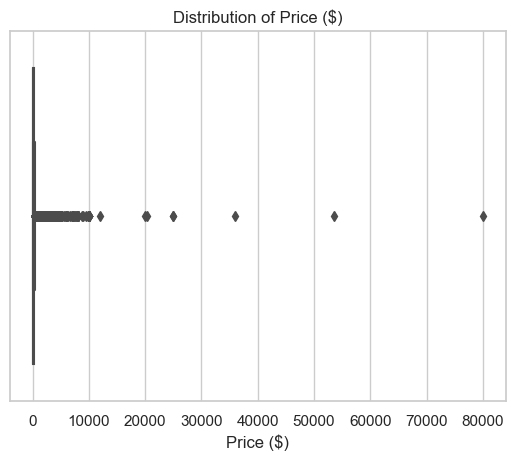

In [35]:
#Distribution of price data visually
bx = sns.boxplot(data=data, x='price')
bx.set(xlabel ="Price ($)", title ='Distribution of Price ($)')
plt.show()

In [36]:
data[data['price']>2000].shape

(245, 32)

###### As observed in the box plot and the calculations above, a very small portion of the price values lie above 2000$ i.e., 0.279%. So we can safely drop those data points from our analysis.

In [37]:
data = data[data['price'] <= 2000]
data.shape

(87701, 32)

In [38]:
#Distribution of Number of reviews (last twelve months) for a listing
data['number_of_reviews_ltm'].describe()

count    87701.000000
mean         5.810664
std         12.762453
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max        594.000000
Name: number_of_reviews_ltm, dtype: float64

**As per data dictionary of Airbnb, `number_of_reviews_ltm` is a calculated column the gives the number of reviews the listing has in the last twelve months. We can assume that more number of reviews (either good or bad) is proportional to the popularity of that particular listing. From the calculation above, over 25% of the data has the number of reviews more than 6. Therefore, we create a new column named `popularity1`.**

In [39]:
data['popularity1'] = data['number_of_reviews_ltm'] > 6

In [40]:
#Distribution of Availability of a listing for the next 365 days
data['availability_365'].describe()

count    87701.000000
mean       120.958244
std        134.476547
min          0.000000
25%          0.000000
50%         65.000000
75%        249.000000
max        365.000000
Name: availability_365, dtype: float64

**As per data dictionary of Airbnb, `availability_365` is a calculated column the gives the availability of the listing in the future. We can assume that less availability is proportional to the popularity of that particular listing. From the calculation above, around 50% of the data has availability less than 65 days. Therefore, we create a new column named `popularity2`.**

In [41]:
data['popularity2'] = data['availability_365'] <=65

In [42]:
#The column amenities contains a string of lists. We transform the same to list objects.
data['amenities'] = data['amenities'].apply(lambda x: eval(x))

##### **Motivation:** Business/Government wants to know popular neighbourhoods in terms of the number of listings in that neighbourhood, which will help them build amenities such as public transport, restaurants, shopping centres, salons etc.
**Question 1:** What are the top few neighbourhoods (say 10-15) with maximum listings, which may help to set up business relevant to tourists, visitors or travellers?

**Assumption:** More listings in an area may be due to high demand in the past by frequent visitors.

In [43]:
#compute how many unique neighbourhood are there
data['neighbourhood_cleansed'].nunique()

33

In [44]:
#Find out top 15 neighbourhood with maximum listings
neighbourhood = data.groupby(['neighbourhood_cleansed']).size().sort_values(ascending=False).reset_index()
neighbourhood.columns = ['Neighbourhood','Counts']
neighbourhood.head(15)

,Neighbourhood,Counts
0,Westminster,9911
1,Tower Hamlets,7069
2,Hackney,6171
3,Kensington and Chelsea,5775
4,Camden,5739
5,Southwark,5007
6,Lambeth,4770
7,Islington,4662
8,Wandsworth,4408
9,Hammersmith and Fulham,3788


**Observation: The above 15 neighbourhoods with their corresponding number of listings covers around 80% of the listings in the data, which will be helpful for the business/government to extend or build facilities. From now on we will mostly concentrate on these neighbourhood listings**

In [45]:
#Extract the listings data corresponding to the top 15 neighbourhood
neighbourhood_15 = data[[i in list(neighbourhood['Neighbourhood'][0:15]) for i in data['neighbourhood_cleansed']]]

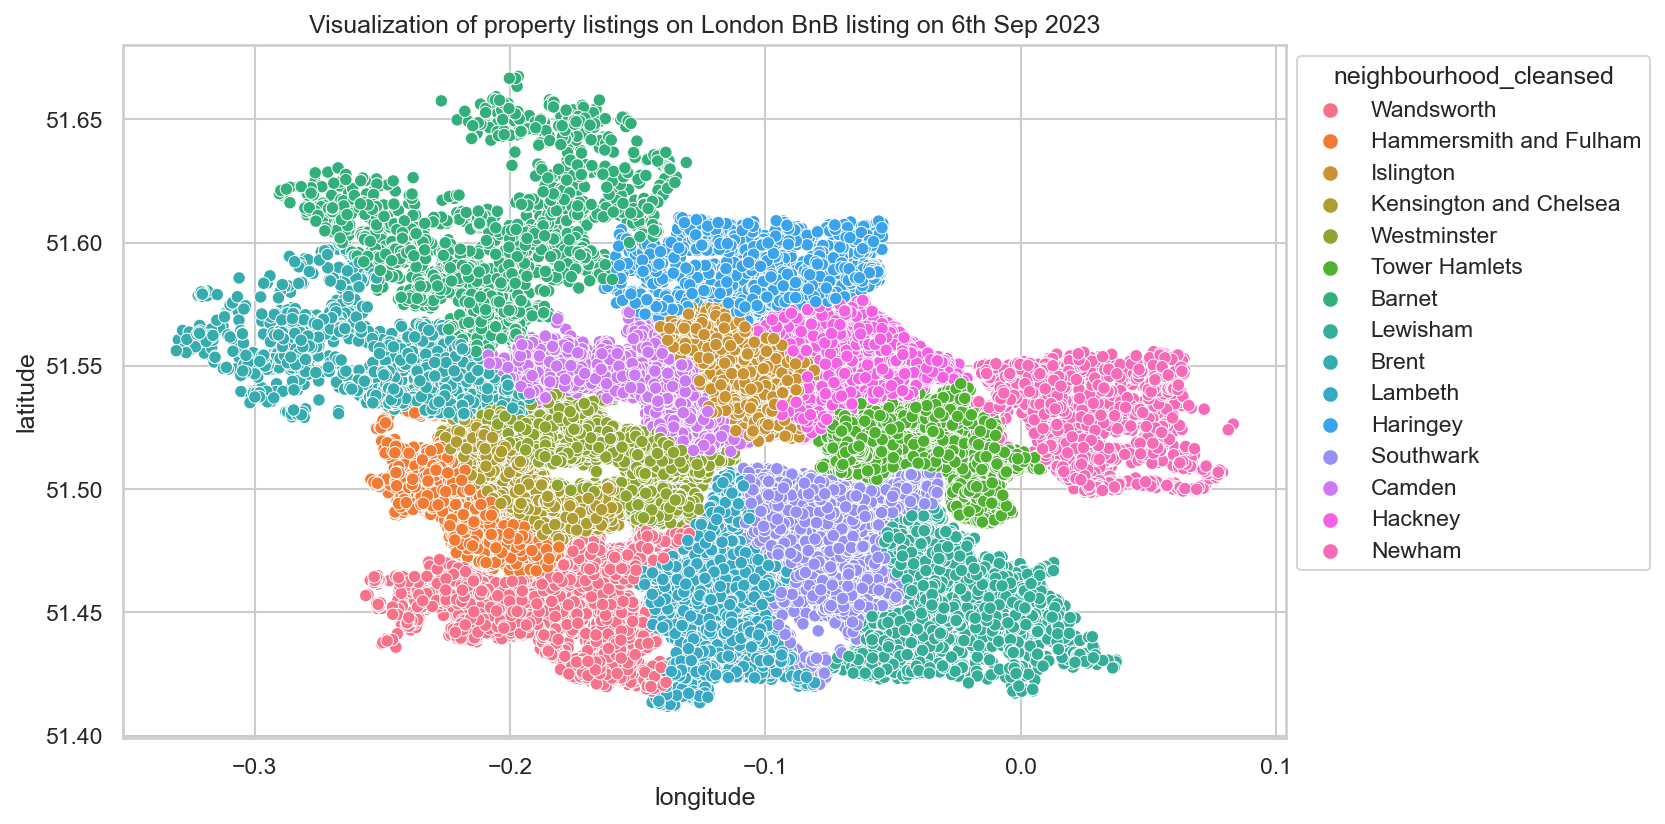

In [46]:
#Visualize how the listings are distributed on a map based on latitude and longitude information
plt.figure(figsize=(10,6), dpi = 150)

# plotting data on chart 
vz = sns.scatterplot(data=neighbourhood_15, x='longitude',y='latitude',hue='neighbourhood_cleansed')
sns.move_legend(vz, "upper left", bbox_to_anchor=(1, 1))

#Add plot title
plt.title('Visualization of property listings on London BnB listing on 6th Sep 2023')
plt.show()

##### **Motivation:** Insights: To understand about the types of room available and how they are distributed across top 15 neighbourhoods
**Question 2:** What are the different room types offered in the listings and how are they distributed across top 15 neighbourhoods?

In [47]:
#Find the distribution of room types
room_type = data['room_type'].value_counts().reset_index()
room_type.columns = ['room_type','counts']

#See the distribution (There are 4 different room types)
room_type

,room_type,counts
0,Entire home/apt,54379
1,Private room,32663
2,Shared room,440
3,Hotel room,219


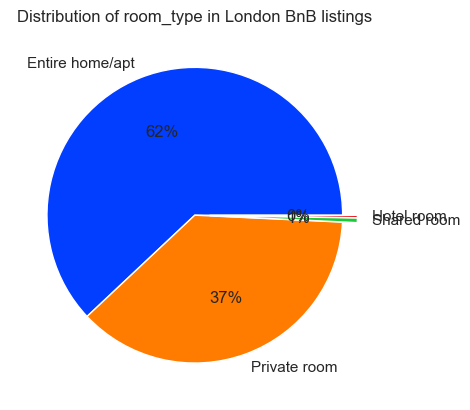

In [48]:
#Displaying the distribution visually

#Define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

explode = [0, 0, 0.1, 0.1]

#Add title to the chart
plt.title('Distribution of room_type in London BnB listings')

#Plotting data on chart 
plt.pie(room_type['counts'], labels=room_type['room_type'], colors=palette_color, explode=explode, autopct='%.0f%%')

plt.show()

**Observation: Around 62% of the listings are of `Entire home/apt` room type and around 37.25% of the listings are of `Private room` type, which is total comprises of 99.25% of the listings.**

In [49]:
#Find the distribution of room types across top 15 neighbourhoods
neighbourhood_15_grp = neighbourhood_15.groupby(['neighbourhood_cleansed','room_type']).size().reset_index()
neighbourhood_15_grp.columns = ['Neighbourhood', 'Room_type','Counts']

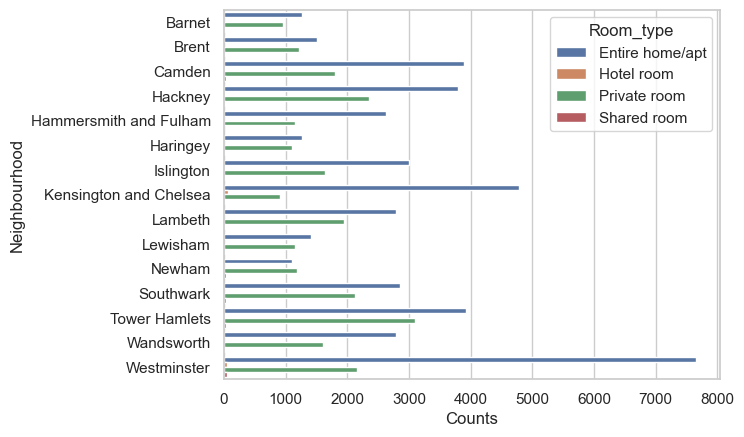

In [50]:
#Draw the barplot
sns.barplot(data=neighbourhood_15_grp, x="Counts", y="Neighbourhood", hue="Room_type")
plt.show()

**Observation: While the neighbourhoods Barnet, Brent, Haringey, Lewisham and Newham have almost same number of `Entire home/apt` and `Private room` types, the neighbourhoods Camden, Kensignton and Chelsea and Westminster have a high number of `Entire home/apt` than the `Private room` types. The numbers for `Hotel room` and `Shared room` are too low to be visible on the plot.**

##### **Motivation:** Insights: It is interesting for Business or Governmental agencies to see what drives the listing prices.
**Question 3:** How does the property type for a given room type affect the price of a listing?

In [51]:
#Find the distribution of property types
property_type = data.groupby(['property_type']).size().sort_values(ascending=False).reset_index()
property_type.columns = ['Property_type','Counts']

#Find the number of property types
print(f'There are {property_type.shape[0]} different property types in the listings')

#Uncomment the below line to see the distribution
#print(property_type)

There are 102 different property types in the listings


In [52]:
#Extract the property types for the top 50 neighbourhoods
property_type_50 = data[[i in list(property_type['Property_type'][0:15]) for i in data['property_type']]]

In [53]:
#Calculate the median price for the property types vs room types
property_type_grp = property_type_50.groupby(['property_type','room_type'])['price'].median()
property_type_grp

property_type                      room_type      
Entire condo                       Entire home/apt    160.0
Entire guesthouse                  Entire home/apt     99.0
Entire home                        Entire home/apt    200.0
Entire loft                        Entire home/apt    130.0
Entire rental unit                 Entire home/apt    143.0
Entire serviced apartment          Entire home/apt    214.0
Entire townhouse                   Entire home/apt    248.0
Private room in bed and breakfast  Private room        80.0
Private room in condo              Private room        68.0
Private room in guesthouse         Private room        89.0
Private room in home               Private room        50.0
Private room in rental unit        Private room        54.0
Private room in townhouse          Private room        55.0
Room in boutique hotel             Hotel room         214.0
                                   Private room       191.0
Room in hotel                      Hotel room    

**Observation: For the `Entire home/apt` room type the listing price is higher for `Entire townhouse` property type and very low for `Entire guesthouse`. Similarly a `Private room` in a `Guesthouse` is much cheaper than in a `Boutique hotel`. Thus we see that the property type influences the listing price for a given room type as visually shown in the heatmap below.**

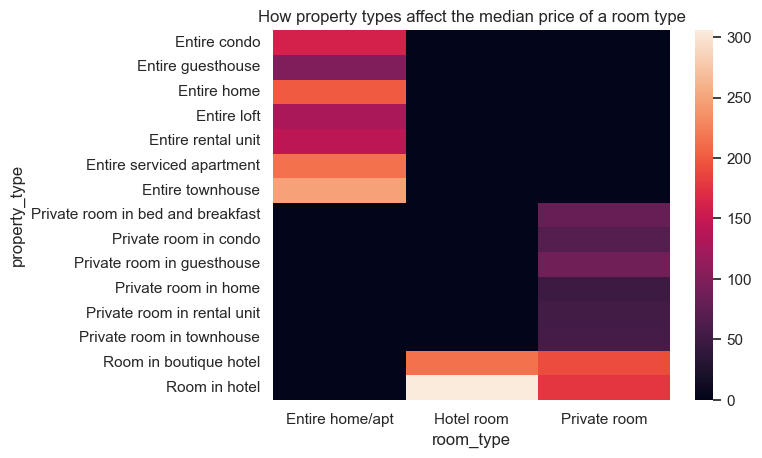

In [54]:
#Display the heatmap of how property type affects the median price of the listing
hm = sns.heatmap(property_type_grp.reset_index().pivot_table('price','property_type','room_type').fillna(0))
plt.title("How property types affect the median price of a room type")
plt.show()

##### **Motivation:** Insights: It is interesting for Business or Governmental agencies to see what drives the listing prices.
**Question 4:** How does the room type affect the price of a listing and are they really different in different neighbourhoods?

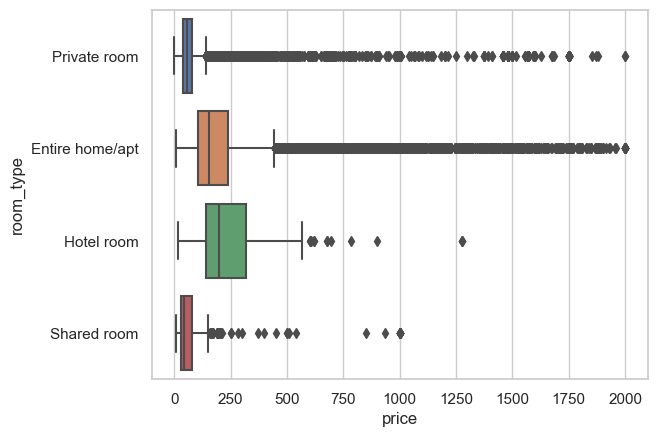

In [55]:
#Distribution of listing prices ($) across different room types
sns.boxplot(data=data, x='price',y='room_type')
plt.show()

**Observation: While the prices for all room typers are low, they are in some cases where the prices for room types are too hight. Generally, as expected `Hotel room` are costlier compared to other room types and the `Shared room` are cheaper. Now, we will explore how the neighbourhood affects the price for `Private room` and `Entire room`.**

In [56]:
#Extract the data for private room and entire_home for top 15 neighbourhoods
private_room = neighbourhood_15[neighbourhood_15['room_type']=='Private room']
entire_home = neighbourhood_15[neighbourhood_15['room_type']=='Entire home/apt']

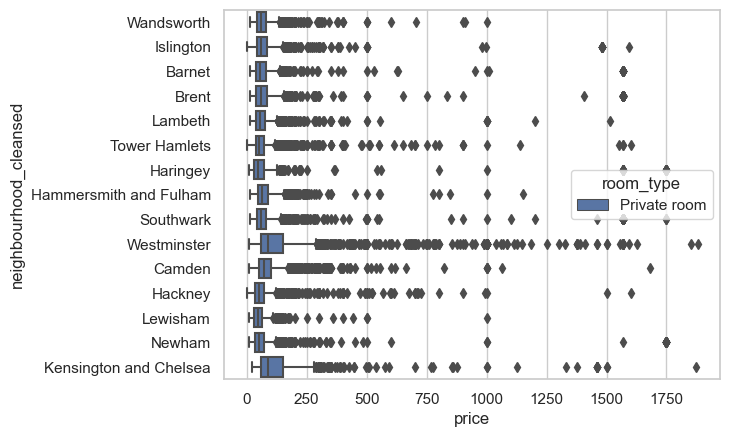

In [57]:
#Plot the distribution of prices for private room for top 15 neighbourhoods
sns.boxplot(data=private_room, x='price', y='neighbourhood_cleansed', hue='room_type')
plt.show()

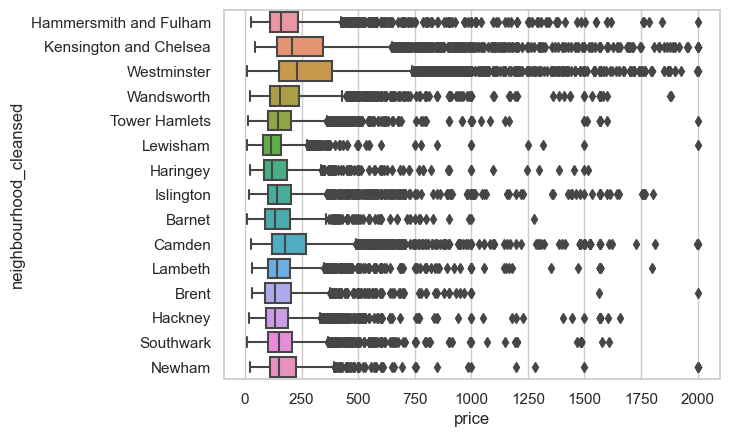

In [58]:
#Plot the distribution of prices for entire room for top 15 neighbourhoods
sns.boxplot(data=entire_home, x='price', y='neighbourhood_cleansed')
plt.show()

**Observation: While the prices across top 15 neighbourhoods are scattered across in similar manner, a keen observation to make is that the median price for *WestMinster* and *Kensington and Chelsea* neighbourhoods are marginally higher than the others.**